In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeRegressor,plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss,mean_squared_error,r2_score

In [2]:
concrete=pd.read_csv("Concrete_Data.csv")
X=concrete.drop('Strength',axis=1)
y=concrete['Strength']

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

In [5]:
dtr=DecisionTreeRegressor(random_state=23,max_depth=2)
model=dtr.fit(X_train,y_train)

In [7]:
y_pred=model.predict(X_test)
y_pred

array([36.89229974, 18.26931677, 56.53790909, 18.26931677, 36.89229974,
       36.89229974, 18.26931677, 56.53790909, 36.89229974, 36.89229974,
       36.89229974, 36.89229974, 56.53790909, 36.89229974, 56.53790909,
       36.89229974, 18.26931677, 56.53790909, 36.89229974, 56.53790909,
       36.89229974, 36.89229974, 36.89229974, 18.26931677, 18.26931677,
       56.53790909, 18.26931677, 36.89229974, 36.89229974, 36.89229974,
       36.89229974, 18.26931677, 56.53790909, 56.53790909, 34.04380952,
       18.26931677, 36.89229974, 34.04380952, 18.26931677, 18.26931677,
       56.53790909, 18.26931677, 36.89229974, 56.53790909, 18.26931677,
       18.26931677, 18.26931677, 34.04380952, 36.89229974, 36.89229974,
       36.89229974, 18.26931677, 36.89229974, 36.89229974, 36.89229974,
       36.89229974, 18.26931677, 34.04380952, 36.89229974, 36.89229974,
       36.89229974, 56.53790909, 36.89229974, 34.04380952, 56.53790909,
       36.89229974, 36.89229974, 36.89229974, 36.89229974, 18.26

In [10]:
mse=mean_squared_error(y_test,y_pred)
mse

146.63548014751504

In [13]:
acc=r2_score(y_test,y_pred)
acc

0.47577257427934094

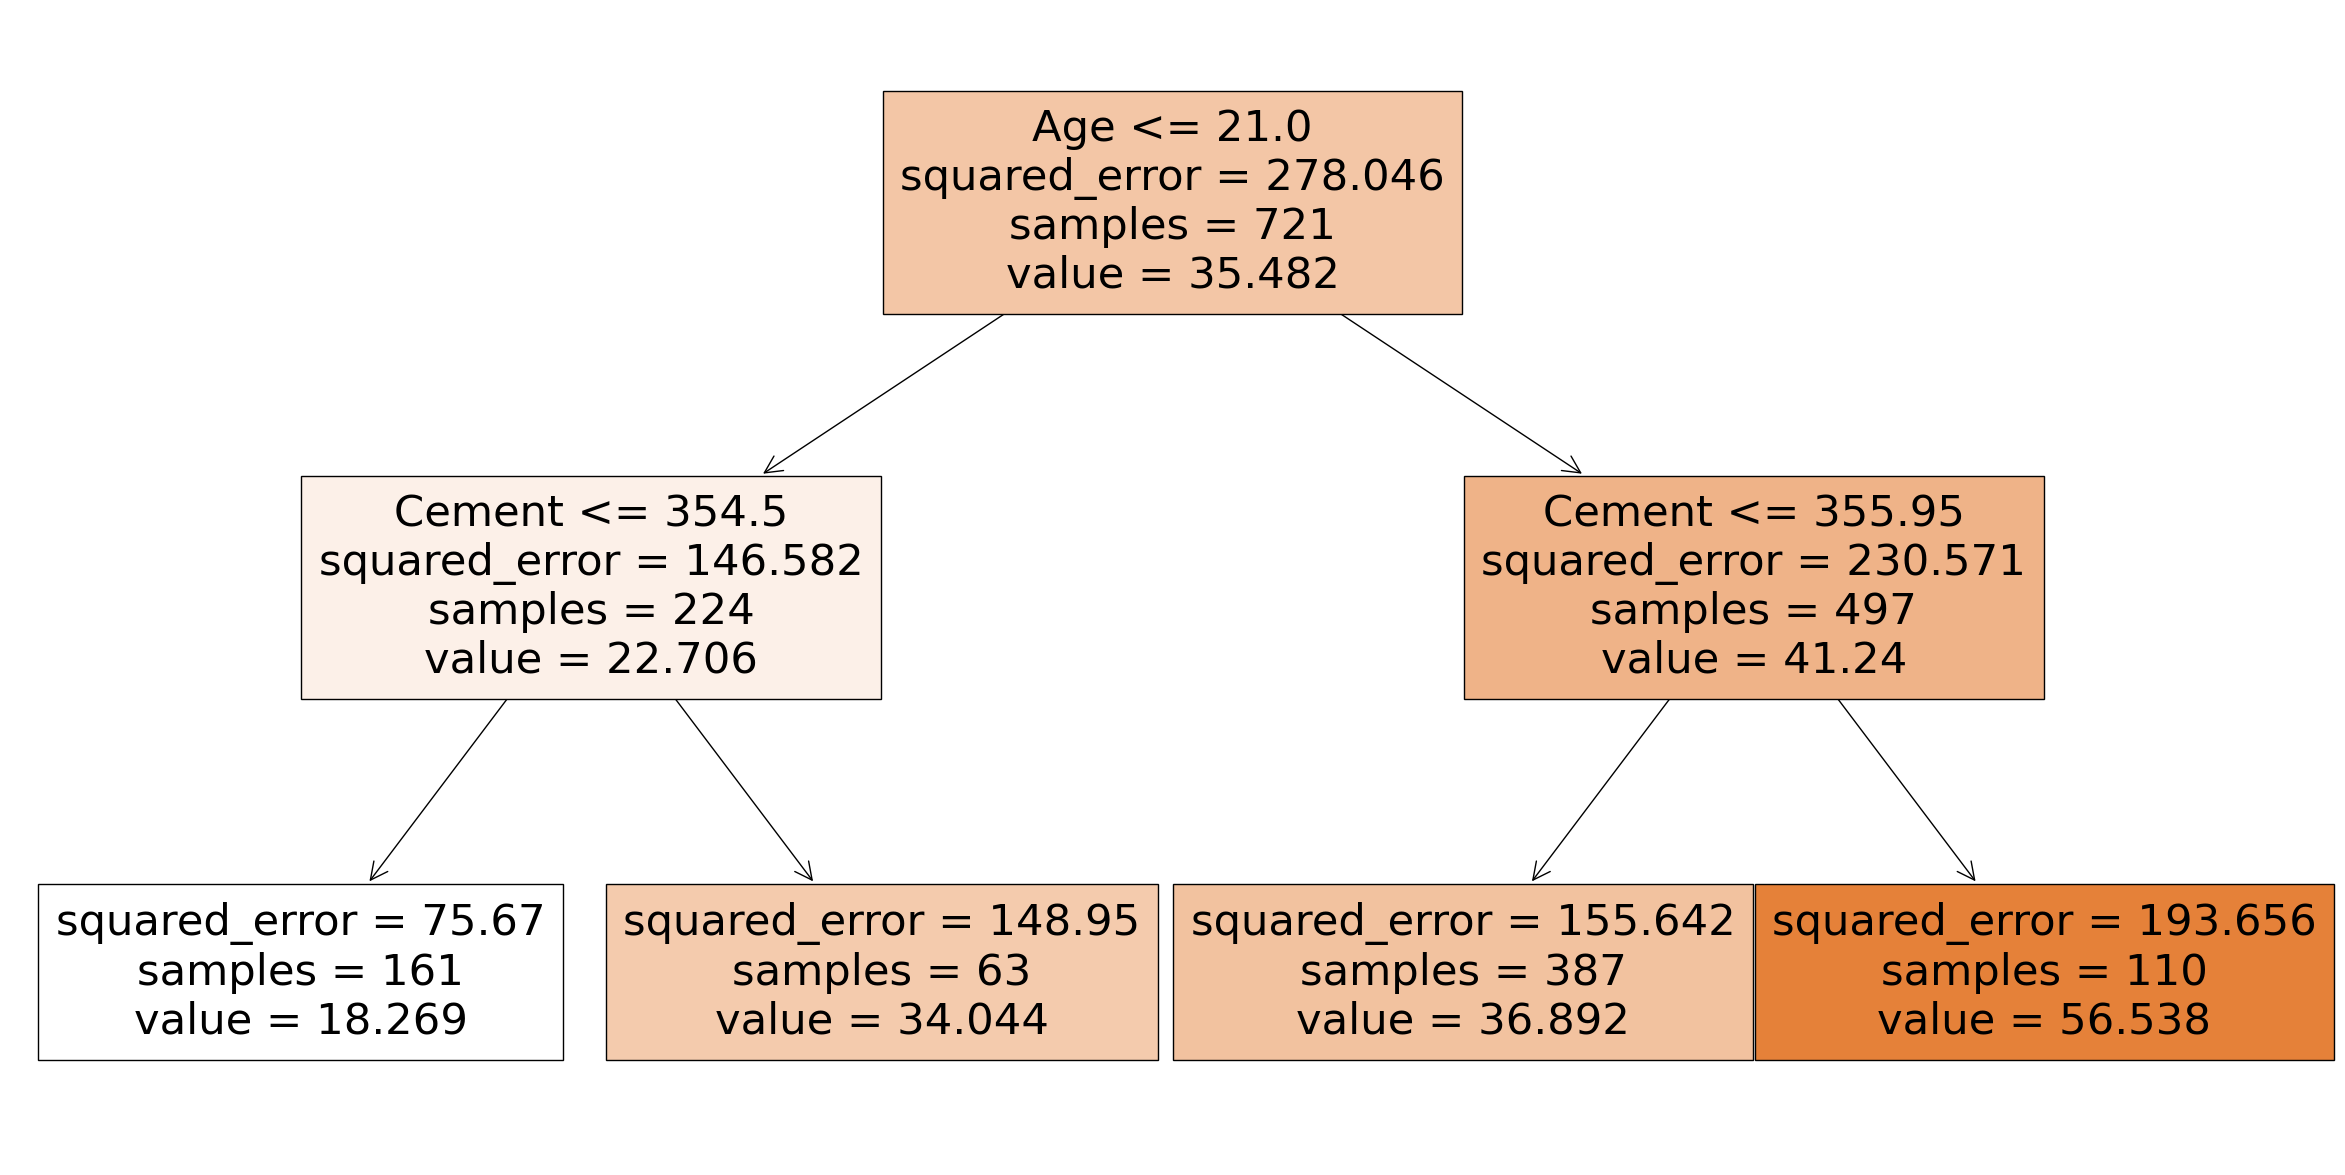

In [23]:
plt.figure(figsize=(30,15))
plot_tree(dtr,feature_names=X_train.columns,filled=True)
plt.show()

## USING GCV

In [14]:
kfold=KFold(n_splits=5,shuffle=True,random_state=23)

In [18]:
params={'max_depth':[2,3,4,5,6,7,8,9,10,None],
       'min_samples_split':[2,5,6,7,8,9,10],
       'min_samples_leaf':[1,3,5,7,10,15]}
gcv=GridSearchCV(dtr,param_grid=params,cv=kfold,scoring='neg_mean_squared_error')
gcv.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeRegressor(max_depth=2, random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'min_samples_leaf': [1, 3, 5, 7, 10, 15],
                         'min_samples_split': [2, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [19]:
print("best parameter :",gcv.best_params_)
print("best score :",gcv.best_score_)

best parameter : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
best score : -42.94542238133765


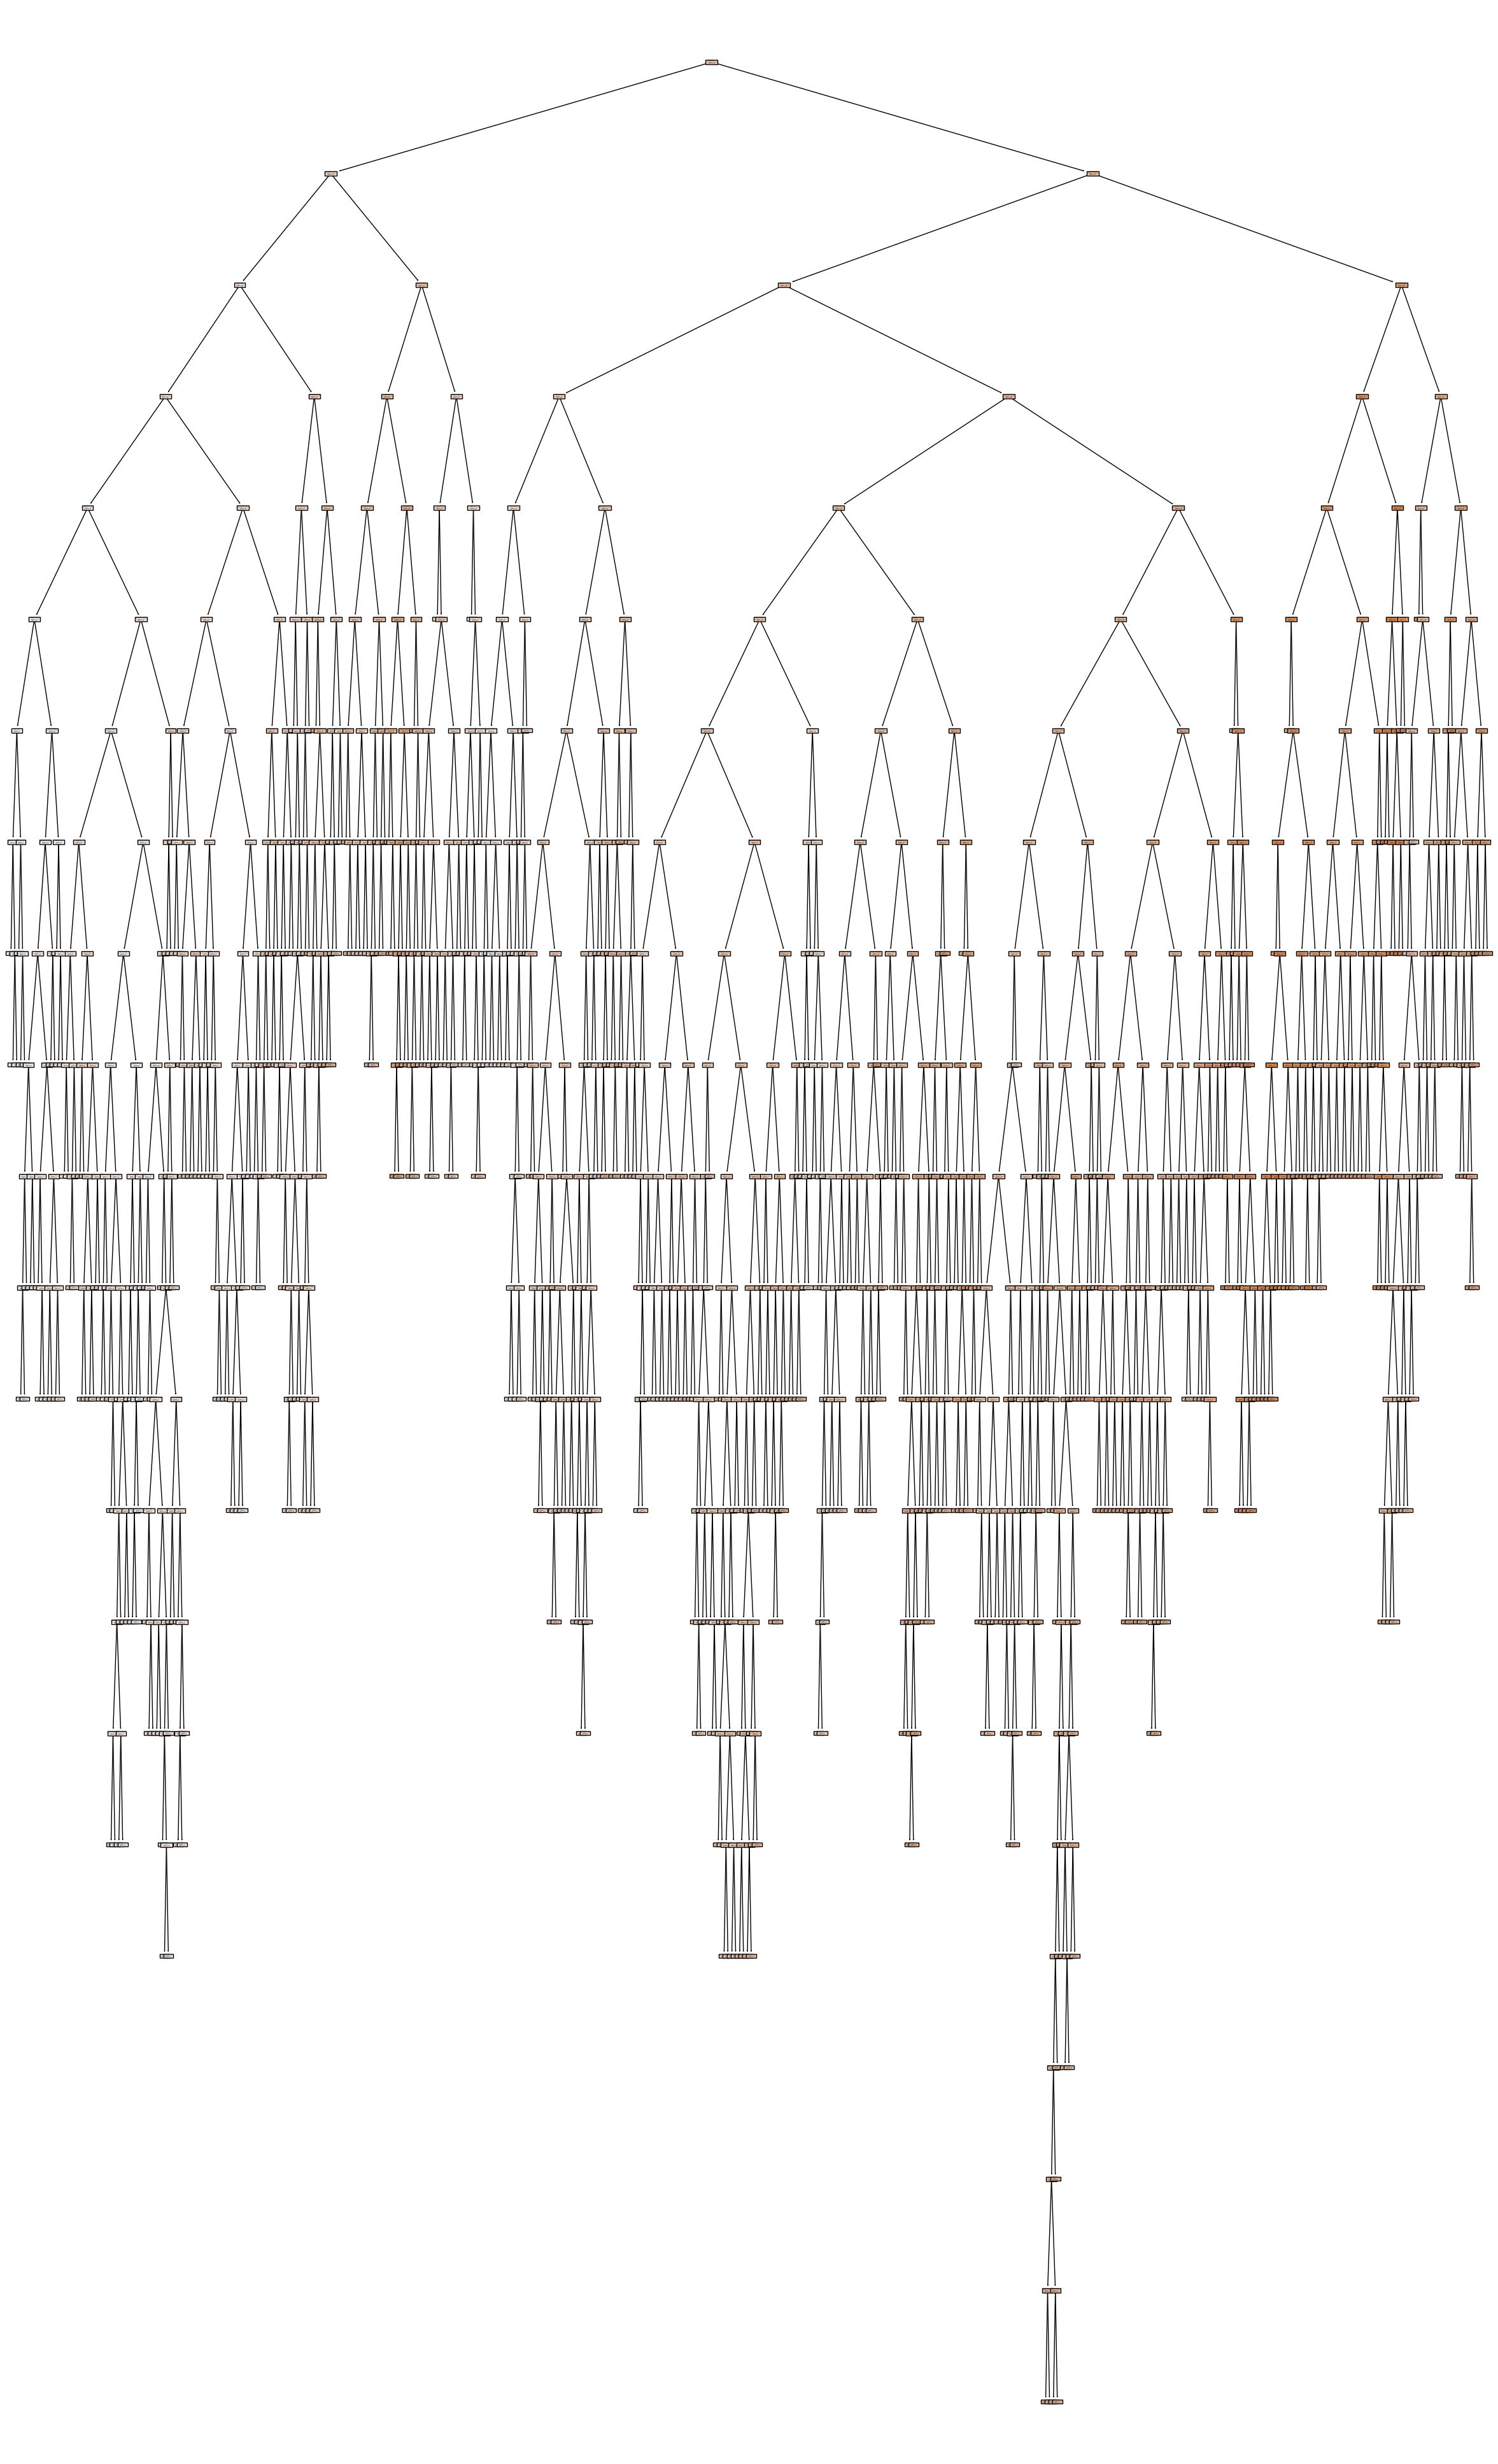

In [28]:
dtr1=DecisionTreeRegressor(random_state=23,max_depth=None)
model=dtr1.fit(X_train,y_train)
plt.figure(figsize=(30,50))
plot_tree(dtr1,feature_names=X_train.columns,filled=True)
plt.show()

## Importance

In [27]:
best_model=gcv.best_estimator_

In [29]:
df_imp=pd.DataFrame({'variable':best_model.feature_names_in_,
                    'importance':best_model.feature_importances_})
df_imp=df_imp[df_imp['importance']>0.0001]
df_imp=df_imp.sort_values(by='importance')

In [30]:
df_imp

,variable,importance
2,Fly,0.012052
4,Superplasticizer,0.025574
6,Fine,0.026781
5,Coarse,0.032468
3,Water,0.109188
1,Blast,0.109381
7,Age,0.322095
0,Cement,0.362461


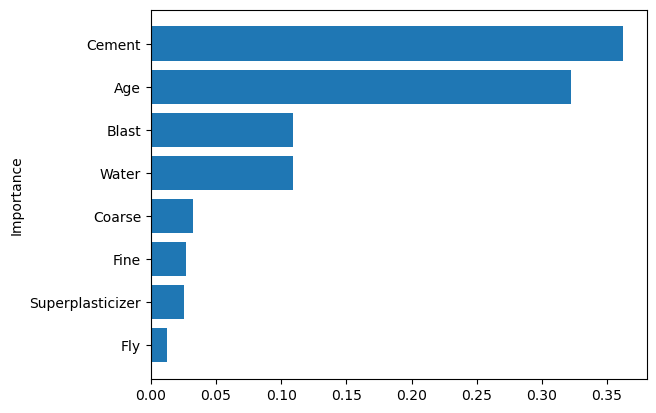

In [31]:
plt.barh(df_imp['variable'],df_imp['importance'])
plt.ylabel("Importance")
plt.show()

In [32]:
import seaborn as sns

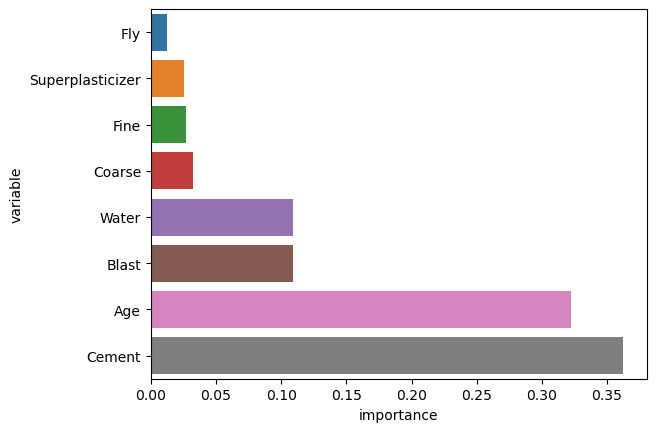

In [36]:
sns.barplot(data=df_imp,y=df_imp['variable'],x=df_imp['importance'],orient='h');